In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data/trip.csv",error_bad_lines=False)
df = df.drop_duplicates()

b'Skipping line 50794: expected 12 fields, saw 20\n'


In [3]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [4]:
df.shape

(236065, 12)

In [5]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [9]:
df[df['starttime']=="2015-11-14 13:48:00"]

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear


In [8]:
df.dtypes

trip_id                       int64
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid                       object
tripduration                float64
from_station_name            object
to_station_name              object
from_station_id              object
to_station_id                object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

In [9]:
df[['trip_id','bikeid']].groupby('bikeid').count()

,trip_id
bikeid,
SEA00001,180
SEA00005,170
SEA00006,175
SEA00007,97
SEA00011,215
...,...
SEA00497,494
SEA00498,534
SEA00499,530


In [16]:
df[['trip_id','starttime']].groupby('starttime').count()

,trip_id
starttime,
2014-10-13 10:31:00,1
2014-10-13 10:32:00,1
2014-10-13 10:33:00,1
2014-10-13 10:34:00,3
2014-10-13 11:35:00,4
...,...
2016-08-31 22:47:00,1
2016-08-31 23:34:00,1
2016-08-31 23:47:00,1


In [31]:
df.groupby(df.starttime.dt.date).size()

starttime
2014-10-13    409
2014-10-14    491
2014-10-15    313
2014-10-16    395
2014-10-17    294
             ... 
2016-08-27    333
2016-08-28    392
2016-08-29    369
2016-08-30    375
2016-08-31    319
Length: 689, dtype: int64

<AxesSubplot:xlabel='starttime'>

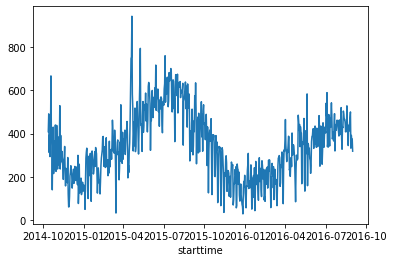

In [33]:
sns.lineplot(data=df.groupby(df.starttime.dt.date).size())

In [43]:
df['bikeid'].unique()

array(['SEA00298', 'SEA00195', 'SEA00486', 'SEA00333', 'SEA00202',
       'SEA00337', 'SEA00311', 'SEA00434', 'SEA00101', 'SEA00461',
       'SEA00044', 'SEA00106', 'SEA00108', 'SEA00236', 'SEA00107',
       'SEA00259', 'SEA00178', 'SEA00123', 'SEA00373', 'SEA00121',
       'SEA00029', 'SEA00436', 'SEA00118', 'SEA00177', 'SEA00348',
       'SEA00459', 'SEA00296', 'SEA00250', 'SEA00303', 'SEA00344',
       'SEA00155', 'SEA00070', 'SEA00428', 'SEA00309', 'SEA00208',
       'SEA00076', 'SEA00172', 'SEA00032', 'SEA00130', 'SEA00445',
       'SEA00247', 'SEA00353', 'SEA00062', 'SEA00390', 'SEA00440',
       'SEA00263', 'SEA00183', 'SEA00048', 'SEA00214', 'SEA00104',
       'SEA00412', 'SEA00438', 'SEA00037', 'SEA00080', 'SEA00058',
       'SEA00405', 'SEA00321', 'SEA00218', 'SEA00467', 'SEA00173',
       'SEA00052', 'SEA00145', 'SEA00089', 'SEA00028', 'SEA00140',
       'SEA00110', 'SEA00063', 'SEA00415', 'SEA00151', 'SEA00269',
       'SEA00355', 'SEA00499', 'SEA00464', 'SEA00308', 'SEA002

In [47]:
for bike_id in df['bikeid'].unique():
    print(df[df['bikeid']==bike_id].iloc[0]['from_station_name'])

2nd Ave & Spring St
2nd Ave & Spring St
2nd Ave & Spring St
2nd Ave & Spring St
2nd Ave & Spring St
2nd Ave & Spring St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave S & S Washington St
Occidental Park / Occidental Ave

Frye Art Museum / Terry Ave & Columbia St
Cal Anderson Park / 11th Ave & Pine St
Seattle Aquarium / Alaskan Way S & Elliott Bay Trail
Frye Art Museum / Terry Ave & Columbia St
Pine St & 9th Ave
Pine St & 9th Ave
Pine St & 9th Ave
NE 42nd St & University Way NE
Dexter Ave & Denny Way
Lake Union Park / Valley St & Boren Ave N
Lake Union Park / Valley St & Boren Ave N
PATH / 9th Ave & Westlake Ave
Bellevue Ave & E Pine St
Harvard Ave & E Pine St
9th Ave N & Mercer St
REI / Yale Ave N & John St
Seattle Aquarium / Alaskan Way S & Elliott Bay Trail
PATH / 9th Ave & Westlake Ave
PATH / 9th Ave & Westlake Ave
Harvard Ave & E Pine St
15th Ave NE & NE 40th St
E Blaine St & Fairview Ave E
REI / Yale Ave N & John St
6th Ave & Blanchard St
6th Ave & Blanchard St
Eastlake Ave E & E Allison St
UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd
Occidental Park / Occidental Ave S & S Washington St
9th Ave N & Mercer St
Eastlake Ave E & E Allison St
Harvard Ave & E Pine St
Republican